# 4.10: Coding Etiquette & Excel Reporting 

# Part 1

## This script contains the following:
### 1. Importing customers_ords_prods data
### 2. Data security issues
### 3. Regional segmentation
### 4. Cross tab
### 5. Exclusion flag
### 6. Customer profiling
### 7. Profile-based visualizations
### 8. Exporting visualizations

In [3]:
#importing libraries, analytical, & visualization tools
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### Question 1

In [4]:
#Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. 
#This should be the merged version of your data that contains the new customers column.

In [4]:
#defining the path
path = r'C:/Users/LocalAdmin/Instacart Basket Analysis'

In [6]:
path

'C:/Users/LocalAdmin/Instacart Basket Analysis'

### 1. importing customers_ords_prods dataset

In [8]:
#importing the last merge dataset as 'merged_data'
merged_data = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'customers_ords_prods.pkl'))

In [10]:
#checking the shape of the merged_data
merged_data.shape

(32434212, 33)

### 2. data security issues

In [70]:
#Consider any security implications that might exist for this new data. 
#You’ll need to address any PII data in the data before continuing your analysis.

In [12]:
#checking the head to see the type of data in the dataframe. This can be achieved by liting the columns in the dataframe too.
merged_data.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,first_name,surname,gender,state,age,date_joined,n_dependants,marital_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302,both
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both


Information such as first name and surname identify with individuals and must be concealed.
Either the same variables are dropped or they are never used in the analysis.

In [14]:
#checking all the columns of merged_data as the head hides some columns
merged_data.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_product_price', 'spending_flag', 'median_days_between_orders',
       'order_frequency', 'first_name', 'surname', 'gender', 'state', 'age',
       'date_joined', 'n_dependants', 'marital_status', 'income', '_merge'],
      dtype='object')

The list of columns confirms that 'fist_name' and 'surname' are part of the dataset. I therefore drop these two columns.

In [16]:
# Drop first name and last name columns due to PII
merged_data.drop(['first_name', 'surname'], axis = 1, inplace = True)

In [94]:
#checking if the 2 columns have been dropped
merged_data.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_product_price', 'spending_flag', 'median_days_between_orders',
       'order_frequency', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'marital_status', 'income', '_merge'],
      dtype='object')

The dataframe is now safe to use as sensitive information has been dropped.

### 3. regional segmentation 

In [98]:
#Create a regional segmentation of the data. 
#You’ll need to create a “Region” column based on the “State” column from your customers data set.
#Use the region information in this Wikipedia article to create your column
#Determine whether there’s a difference in spending habits between the different U.S. regions.

In [18]:
#Listing all states appearing in the dataframe for inclusion in the region
merged_data['state'].value_counts(dropna=False)

state
Pennsylvania            667710
California              660447
Rhode Island            657655
Georgia                 657072
New Mexico              655143
Arizona                 654545
North Carolina          652338
Oklahoma                652263
Alaska                  649020
Minnesota               648408
Massachusetts           647000
Wyoming                 644929
Virginia                642075
Missouri                641313
Texas                   641058
Colorado                639752
Maine                   639149
North Dakota            638999
Alabama                 638617
Louisiana               638174
Kansas                  637991
Delaware                637447
South Carolina          637348
Oregon                  636949
Arkansas                636706
Nevada                  636697
New York                636697
Montana                 635835
South Dakota            634340
Illinois                633490
Hawaii                  633445
Washington              633421
Mi

In [20]:
# Defining the Northeast Region
northeast_region = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont' ]

In [24]:
# Defining the Midwest Region
midwest_region = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [26]:
# Defining the South Region
south_region = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [28]:
# Defining the West Region
west_region = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [30]:
# Create a new column 'region' using the regions defined above
merged_data.loc[merged_data['state'].isin(northeast_region), 'region'] = 'n_east'
merged_data.loc[merged_data['state'].isin(midwest_region), 'region']='midwest'
merged_data.loc[merged_data['state'].isin(south_region), 'region']= 'south'
merged_data.loc[merged_data['state'].isin(west_region), 'region']= 'west'

In [172]:
#checking if regions add up to the total dataframe

In [32]:
len(merged_data['region'])

32434212

In [34]:
#adding the appearances of the 4 regions in the merged_data dataframe
merged_data['region'].value_counts(dropna=False)

region
south      10801610
west        8300445
midwest     7603810
n_east      5728347
Name: count, dtype: int64

### 4. cross tab

In [38]:
# Defining the crosstab between region and spending flag
region_vs_spending_crosstab = pd.crosstab(merged_data['region'], merged_data['spending_flag'], dropna = False)

In [204]:
#Using crosstab to see if spending differs with regions. spending flags are adopted are hinted
region_vs_spending_crosstab

spending_flag,High spender,Low spender
region,,
midwest,156129,7447681
n_east,108343,5620004
south,210182,10591428
west,160807,8139638


The south region leads the list of high spenders as well as the low spenders. The north east region has the lowest count of high spenders and low spenders too. This seemingly imply that the count of high and low spenders might be a function of the population in these regions.

### 5. Exclusion flag

In [40]:
#Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. 
#Make sure you export this sample.

In [42]:
# Create a column, 'exclusion_flag' for users with fewer than 5 orders
merged_data.loc[merged_data['max_order'] < 5, 'exclusion_flag'] = 'exclude'

In [44]:
# Create another column, 'inclusion_flag' for orders >/= 5 orders
merged_data.loc[merged_data['max_order'] >= 5, 'exclusion_flag'] = 'include'

In [46]:
# Checking if new flags are appearing in merged_data
merged_data.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,gender,state,age,date_joined,n_dependants,marital_status,income,_merge,region,exclusion_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,midwest,include
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,midwest,include
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Female,Vermont,66,6/16/2018,2,married,158302,both,n_east,include
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Female,Wisconsin,40,2/9/2020,3,married,31308,both,midwest,exclude
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Female,Wisconsin,40,2/9/2020,3,married,31308,both,midwest,exclude


Exclusion flag is now appearing in the dataframe and the lables 'include' and 'exclude' are appearing in the column.

In [48]:
#Does the count of exclusion and inclusion add up to the total datapoint in merged_data?
merged_data['exclusion_flag'].value_counts(dropna=False)

exclusion_flag
include    30992664
exclude     1441548
Name: count, dtype: int64

In [54]:
#manual summation
30992664+1441548

32434212

In [56]:
len(merged_data)

32434212

Exclusion and exclusion add to the same number of datapoints in merged_data. So all is okay.

In [60]:
# Only excel makes it easy to check if all orders bess than 5 are properly flagged. Crosstab!
exclusion_flag_check = pd.crosstab(merged_data['exclusion_flag'], merged_data['max_order'], dropna = False)

In [62]:
# Copy the crosstab data for pasting in Excel
exclusion_flag_check.to_clipboard()

Excel data approves that orders less than 5 are flagged 'excluded'

In [64]:
# Define a sample without excluded rows
merged_data = merged_data[merged_data['exclusion_flag'] == 'include']

In [66]:
#How many rows do I have now?
merged_data.shape

(30992664, 33)

The number of rows equal the number of inclusion hence the new dataframe is proof of errors.

In [264]:
# Export the new sample of included orders
merged_data.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'inclusion_sample.pkl'))

### 6. customer profiling

In [268]:
#Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.
#Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent

In [68]:
# Create age identifiers:age<40==young_adult, 40<=age<60==adult, age>=60==senior
merged_data.loc[merged_data['age']<40, 'age_group']='young_adult'
merged_data.loc[(merged_data['age']>=40) & (merged_data['age']<60), 'age_group']= 'adult'
merged_data.loc[merged_data['age']>=60, 'age_group']='senior'

In [70]:
# Checking the counts for the 3 age groups created
merged_data['age_group'].value_counts(dropna = False)

age_group
young_adult    10674650
senior         10583941
adult           9734073
Name: count, dtype: int64

In [72]:
#manually checking the total of the sub-age groups
10674650+10583941+9734073

30992664

The total mimicks the total number of rows in the sample of merged_data, thus age groups were created successfully.

In [74]:
#Using head to see the age_group column
merged_data.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,state,age,date_joined,n_dependants,marital_status,income,_merge,region,exclusion_flag,age_group
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Minnesota,81,8/1/2019,1,married,49620,both,midwest,include,senior
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Minnesota,81,8/1/2019,1,married,49620,both,midwest,include,senior
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Vermont,66,6/16/2018,2,married,158302,both,n_east,include,senior
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,...,Hawaii,51,1/4/2019,2,married,57797,both,west,include,adult
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,...,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171,both,south,include,young_adult


The age groups created are all appearing in the column 'age_group'

In [76]:
#Checking if orders_day_of_week is different for the different age groups
merged_data.groupby('age_group').agg({'orders_day_of_week':['min', 'mean', 'max']})

orders_day_of_week              
                           min      mean max
age_group                                   
adult                        0  2.744254   6
senior                       0  2.746811   6
young_adult                  0  2.733264   6

### 7. Profile-based visualizations

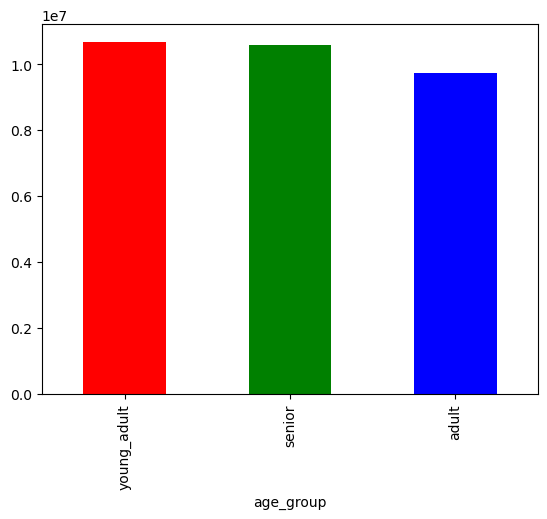

In [338]:
# Create bar chart for the 3 age groups
bar=merged_data['age_group'].value_counts().plot.bar(color =['red', 'green', 'blue'])

In [342]:
# Exporting bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_profiling.png'), bbox_inches='tight')

In [78]:
# Creating a variable based on whether a user has dependants or not 
merged_data.loc[merged_data['n_dependants']>0,'dependants_flag']='has_dependants'
merged_data.loc[merged_data['n_dependants']==0,'dependants_flag']='no_dependants'

In [80]:
#checking the counts of the new classifications
merged_data['dependants_flag'].value_counts(dropna=False)

dependants_flag
has_dependants    23245632
no_dependants      7747032
Name: count, dtype: int64

In [398]:
#checkimg the head for the new variable
merged_data.head(20)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,age,date_joined,n_dependants,marital_status,income,_merge,region,exclusion_flag,age_group,dependants_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,81,8/1/2019,1,married,49620,both,midwest,include,senior,has_dependants
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,81,8/1/2019,1,married,49620,both,midwest,include,senior,has_dependants
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,66,6/16/2018,2,married,158302,both,n_east,include,senior,has_dependants
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,...,51,1/4/2019,2,married,57797,both,west,include,adult,has_dependants
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,...,20,5/8/2019,3,living with parents and siblings,34171,both,south,include,young_adult,has_dependants
7,1,Chocolate Sandwich Cookies,61,19,5.8,1290456,910,12,3,10,...,65,7/25/2019,0,divorced/widowed,44856,both,south,include,senior,no_dependants
8,1,Chocolate Sandwich Cookies,61,19,5.8,369558,1052,10,1,20,...,72,3/30/2018,1,married,153843,both,west,include,senior,has_dependants
9,1,Chocolate Sandwich Cookies,61,19,5.8,589712,1052,15,1,12,...,72,3/30/2018,1,married,153843,both,west,include,senior,has_dependants
10,1,Chocolate Sandwich Cookies,61,19,5.8,1798115,1379,1,5,11,...,61,3/30/2020,1,married,42573,both,west,include,senior,has_dependants
11,1,Chocolate Sandwich Cookies,61,19,5.8,497193,1480,36,3,13,...,19,12/28/2019,1,living with parents and siblings,32283,both,south,include,young_adult,has_dependants


In [86]:
#Checking if orders_day_of_week is different for the different dependants_flag
merged_data.groupby('dependants_flag').agg({'orders_day_of_week':['min', 'mean', 'max']})

orders_day_of_week              
                               min      mean max
dependants_flag                                 
has_dependants                   0  2.743046   6
no_dependants                    0  2.736227   6

There is no difference in summary stats for the 2 dependants flags

In [91]:
#Checking if orders_day_of_week is different for the 'order_hour_of_day'
merged_data.groupby('dependants_flag').agg({'order_hour_of_day':['min', 'mean', 'max']})

order_hour_of_day               
                              min       mean max
dependants_flag                                 
has_dependants                  0  13.407434  23
no_dependants                   0  13.420996  23

There is no diference amongst the two groups

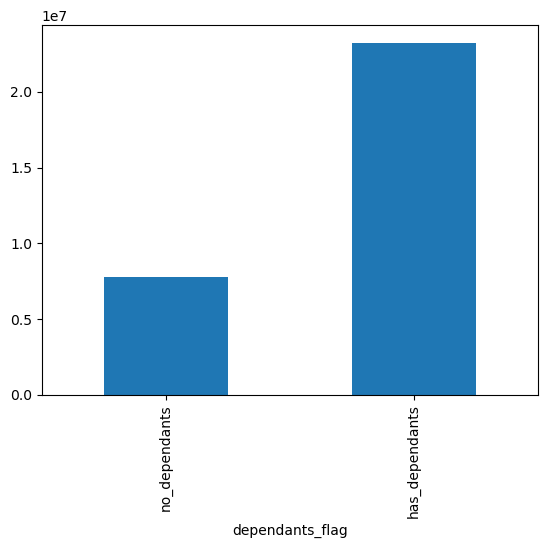

In [95]:
#Bar chart for number of dependants
bar1 = merged_data['dependants_flag'].value_counts().sort_values().plot.bar()

In [97]:
# Exporting bar chart
bar1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dependants_profiling.png'), bbox_inches='tight')

In [99]:
#Defining a variable, 'income_group' based on income <= 100000 == low, and income>100000==high
merged_data.loc[merged_data['income']<=100000, 'income_group'] ='low'
merged_data.loc[(merged_data['income']>100000) & (merged_data['income']<150000), 'income_group'] = 'middle'
merged_data.loc[merged_data['income']>150000, 'income_group']= 'high'

In [440]:
#checking the counts of the new income classifications
merged_data['income_group'].value_counts(dropna=False)

income_group
low       16773620
middle    10320393
high       3898651
Name: count, dtype: int64

In [103]:
#manual summation
16773620+10320393+3898651

30992664

In [105]:
#count for merged dataframe
len(merged_data)

30992664

The sum for income_group is the same as that for the merged_data.

In [111]:
# head of merged_data to see the new income classification
merged_data.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,date_joined,n_dependants,marital_status,income,_merge,region,exclusion_flag,age_group,dependants_flag,income_group
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,8/1/2019,1,married,49620,both,midwest,include,senior,has_dependants,low
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,8/1/2019,1,married,49620,both,midwest,include,senior,has_dependants,low
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,6/16/2018,2,married,158302,both,n_east,include,senior,has_dependants,high
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,...,1/4/2019,2,married,57797,both,west,include,adult,has_dependants,low
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,...,5/8/2019,3,living with parents and siblings,34171,both,south,include,young_adult,has_dependants,low


In [113]:
# Aggregate 'income_group' by 'days_since_prior_order'
merged_data.groupby('income_group').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                               mean  min   max
income_group                                  
high                      10.684238  0.0  30.0
low                       10.844703  0.0  30.0
middle                    10.802359  0.0  30.0

There seem to be insignificant difference amongst the 3 income groups

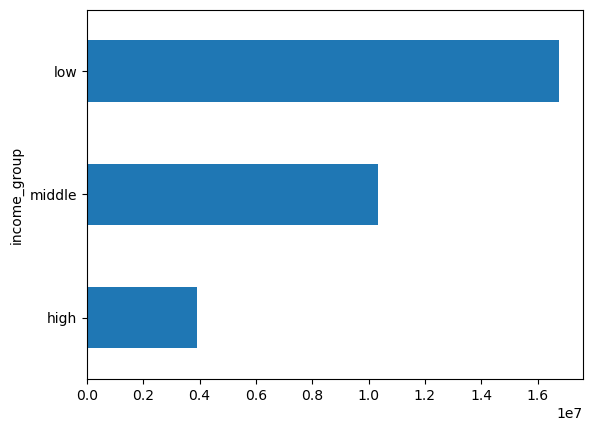

In [117]:
#Bar chart for income_groups
bar2 = merged_data['income_group'].value_counts().sort_values().plot.barh()

In [119]:
# Exporting bar chart
bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_group.png'), bbox_inches='tight')

##### Question 6: Creating appropriate visualizationsto show the distribution of profiles.

In [175]:
#see all columns in the dataframe
merged_data.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_product_price', 'spending_flag', 'median_days_between_orders',
       'order_frequency', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'marital_status', 'income', '_merge', 'region',
       'exclusion_flag', 'age_group', 'dependants_flag', 'income_group'],
      dtype='object')

I can profile 'income_group', 'age_group' and dependants_flag

In [130]:
# Creating a sample of merged_data showing user_id, age_group, income_group, dependants_flag, and loyalty_flag columns
user_sample = merged_data[['user_id', 'age_group', 'income_group', 'dependants_flag', 'region', 'loyalty_flag']]

In [133]:
# Dropping duplicate rows in sample to get unique customers
user_sample = user_sample.drop_duplicates()

In [136]:
# checking sampled data
user_sample

,user_id,age_group,income_group,dependants_flag,region,loyalty_flag
0,138,senior,low,has_dependants,midwest,Regular customer
2,709,senior,high,has_dependants,n_east,New customer
5,777,adult,low,has_dependants,west,Regular customer
6,825,young_adult,low,has_dependants,south,New customer
7,910,senior,low,no_dependants,south,Regular customer
...,...,...,...,...,...,...
30451937,169498,adult,high,has_dependants,n_east,New customer
30752322,28213,adult,middle,has_dependants,south,New customer
31477548,18512,senior,low,no_dependants,midwest,New customer
31954713,31628,young_adult,low,has_dependants,south,New customer


##### Income group in the sample

In [147]:
# value counts for each income group
income_group_counts = user_sample['income_group'].value_counts()

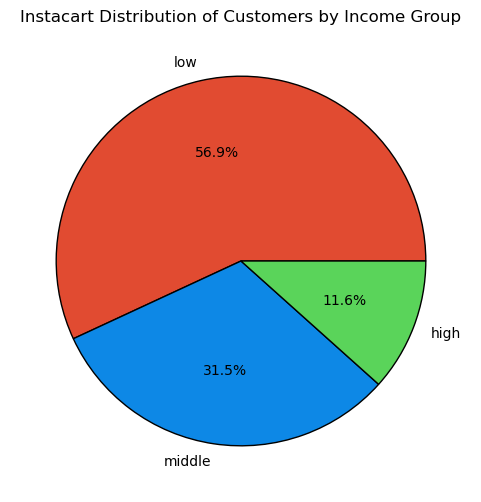

In [155]:
# Create a pie chart of income_groups, save and export it to project folder
plt.figure(figsize=(6, 6))           # Control size of chart
plt.pie(income_group_counts, 
        labels = income_group_counts.index, 
        autopct='%.1f%%',            # Show percentage to one decimal point
        colors = ['#e14b31', '#0d88e6', '#5ad45a'],   # Set colors using color palette
        wedgeprops = {'edgecolor' : 'black'})       # Set color of boarders
plt.title('Instacart Distribution of Customers by Income Group')      # Set title of pie chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customers_income_groups_pie.png'), bbox_inches = 'tight')   # Save pie chart and export to project folder
plt.show()

##### Distribution by age_group

In [157]:
## Counts for age_group
age_group_counts = user_sample['age_group'].value_counts()

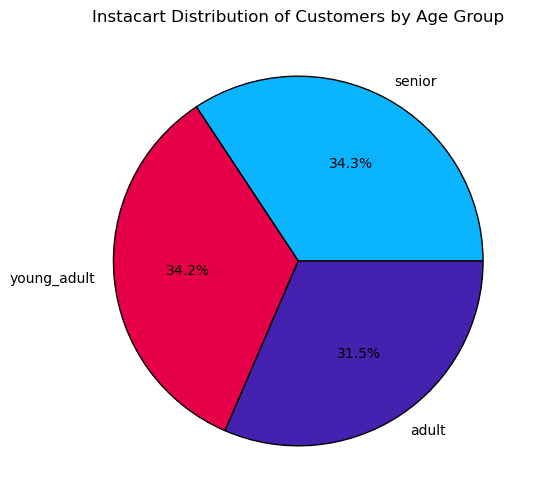

In [160]:
# Creating a pie Chart for age_group and proceed to save and export it to analysis folder
plt.figure(figsize=(6, 6)) # Control size of chart
plt.pie(age_group_counts, 
        labels = age_group_counts.index, 
        autopct='%.1f%%', # Show percentage to one decimal point
        colors = ['#0bb4ff', '#e60049', '#4421af', '#5ad45a', '#ffa300', '#ebdc78'], # Set colors using color palette
        wedgeprops = {'edgecolor' : 'black'}) # Set color of boarders
plt.title('Instacart Distribution of Customers by Age Group') # Set title of pie chart title
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customers_age_groups_pie.png'), bbox_inches = 'tight') # Save pie chart and export to project folder
plt.show()

##### Profiling by dependants_status

In [167]:
# creating counts for the  dependents_flag
dependants_flag_counts = user_sample['dependants_flag'].value_counts()

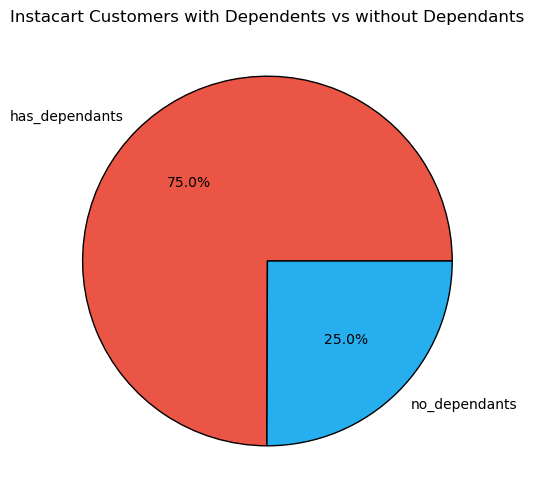

In [170]:
# Creating a pie chart for dependant_status, and export to Analysis folder
plt.figure(figsize=(6, 6))           # Set size of pie chart
plt.pie(dependants_flag_counts, 
        labels = dependants_flag_counts.index, 
        autopct='%.1f%%',         # Show percentage to one decimal point
        colors = ['#ea5545', '#27aeef'],       # Set colors using color palette
        wedgeprops = {'edgecolor' : 'black'})  # Set color of boarders of pie chart
plt.title('Instacart Customers with Dependents vs without Dependants')   # Set title of pie chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customers_dependants_pie.png'), bbox_inches = 'tight')  # Save and export pie chart
plt.show()

##### Question 7: Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [185]:
# Creating subset of order data using sum of the prices column as the total cost of each order:
orders_subset = merged_data.groupby(['user_id', 'age_group', 'income_group', 'dependants_flag', 'loyalty_flag', 'region', 'order_number', 'days_since_prior_order'])['prices'].sum().reset_index()

In [188]:
# Renaming the 'prices' column to 'total_order' to match the aggregation done in step above.
orders_subset.rename(columns = {'prices' : 'total_order'}, inplace = True)

In [193]:
# Checking the head of the data subset and the new column 'total_order'
orders_subset.head()

,user_id,age_group,income_group,dependants_flag,loyalty_flag,region,order_number,days_since_prior_order,total_order
0,1,young_adult,low,has_dependants,New customer,south,2,15.0,35.4
1,1,young_adult,low,has_dependants,New customer,south,3,21.0,28.2
2,1,young_adult,low,has_dependants,New customer,south,4,29.0,26.0
3,1,young_adult,low,has_dependants,New customer,south,5,28.0,57.0
4,1,young_adult,low,has_dependants,New customer,south,6,19.0,25.0


##### Aggregating by income_group

In [202]:
# Creating a subset of data by income_group and calculate the max, min, and mean
income_cat_agg = orders_subset.groupby('income_group').agg({'days_since_prior_order' : ['min', 'mean', 'max'],'total_order' : ['min', 'mean', 'max']})

In [205]:
#validation
income_cat_agg

days_since_prior_order                  total_order              \
                                min       mean   max         min        mean   
income_group                                                                   
high                            0.0  10.140818  30.0         1.0  343.974683   
low                             0.0  10.483747  30.0         1.0   79.081775   
middle                          0.0  10.306466  30.0         1.0  109.041753   

                        
                   max  
income_group            
high          100452.9  
low           100264.7  
middle        100384.5

##### Aggregating by dependants_flag

In [211]:
# Creating a subset of dependant_category and calculate the max, min, and mean
dependants_cat_agg = orders_subset.groupby('dependants_flag').agg({'days_since_prior_order' : ['min', 'mean', 'max'],'total_order' : ['min', 'mean', 'max']})

In [213]:
#Validation
dependants_cat_agg

days_since_prior_order                  total_order  \
                                   min       mean   max         min   
dependants_flag                                                       
has_dependants                     0.0  10.388272  30.0         1.0   
no_dependants                      0.0  10.378248  30.0         1.0   

                                       
                       mean       max  
dependants_flag                        
has_dependants   120.138009  100452.9  
no_dependants    121.985646  100384.5

##### Aggregation by age_group

In [218]:
# Defining a subset of data by age_group and calculate the max, min, and mean
age_cat_agg = orders_subset.groupby('age_group').agg({'days_since_prior_order' : ['min', 'mean', 'max'], 'total_order' : ['min', 'mean', 'max']})

In [220]:
# Validation
age_cat_agg

days_since_prior_order                  total_order              \
                               min       mean   max         min        mean   
age_group                                                                     
adult                          0.0  10.368224  30.0         1.0  121.405077   
senior                         0.0  10.386063  30.0         1.0  118.099933   
young_adult                    0.0  10.401589  30.0         1.0  122.363518   

                       
                  max  
age_group              
adult        100442.8  
senior       100452.9  
young_adult  100384.5

##### Question 8: Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [229]:
# Customers by regions

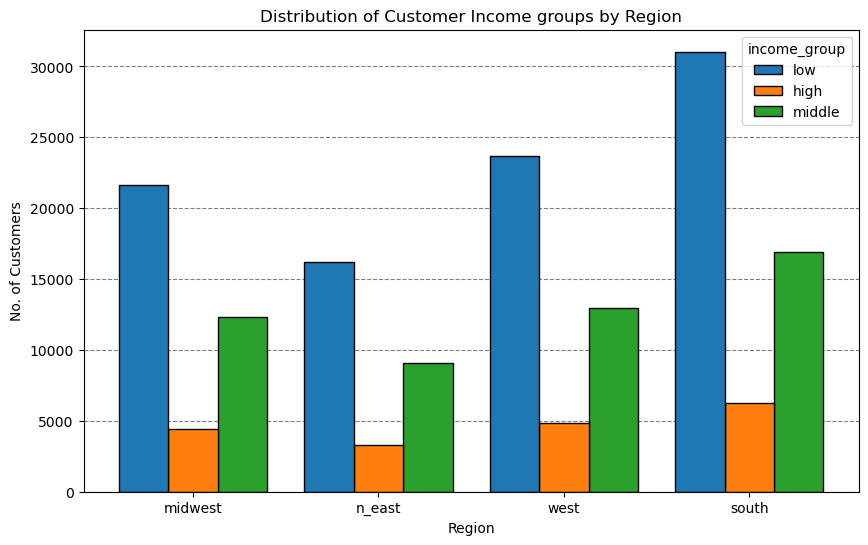

In [232]:
# Defining a histogram to show customer counts by income group and region
plt.figure(figsize=(10, 6))
sns.histplot(data=user_sample, x='region', hue='income_group', multiple='dodge', shrink=.8, alpha=1)
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
plt.title('Distribution of Customer Income groups by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_income_by_region.png'), bbox_inches = 'tight')
plt.show()

In [238]:
# Validation by crosstabing
pd.crosstab(user_sample['income_group'], user_sample['region'], dropna = False)

region,midwest,n_east,south,west
income_group,,,,
high,4449,3323,6265,4874
low,21620,16212,31037,23682
middle,12307,9045,16891,12925
NaN,1,1,1,0


##### Age groups by regions

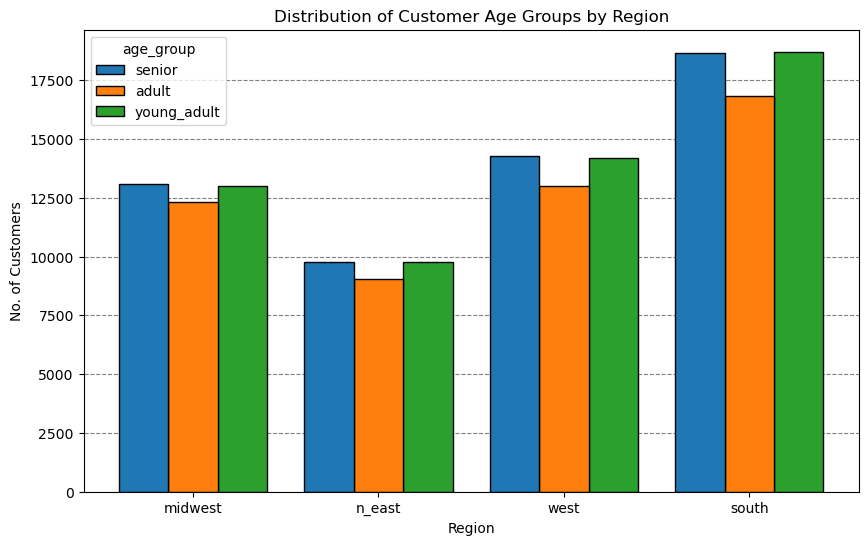

In [243]:
# Creating a histogram showing counts of age_group by region
plt.figure(figsize=(10, 6))
sns.histplot(data=user_sample, x='region', hue='age_group', multiple='dodge', shrink=.8, alpha=1)
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
plt.title('Distribution of Customer Age Groups by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_age_by_region.png'), bbox_inches = 'tight') 
plt.show()

In [247]:
# Validation of histogram by crosstabbing
pd.crosstab(user_sample['age_group'], user_sample['region'], dropna = False)

region,midwest,n_east,south,west
age_group,,,,
adult,12316,9054,16819,13009
senior,13082,9756,18669,14268
young_adult,12979,9771,18706,14204


##### Department group by region

In [258]:
# The department data must be merged with the merged_data for any analysis to be done based on departments
# I have to import wrangled department data, use data dictionary to define way of merging the two datframes 

In [261]:
# Import the departments_wrangled csv file
df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [272]:
# Validation by checking all the departments
df_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [277]:
df_dept.columns

Index(['Unnamed: 0', 'department'], dtype='object')

In [309]:
#renaming 'Unnamed: 0' to 'department_id' in the df_dept dataframe
df_dept.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace =True) 

In [311]:
#checking the columns again
df_dept.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [313]:
# generating a data dictionary from the df_dept dataframe
zipped=zip(df_dept['department_id'], df_dept['department'])
data_dict=dict(zipped)
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [318]:
# Linking the department names to the department_id in the dataframe
merged_data['department'] = merged_data['department_id'].map(data_dict)

In [321]:
#validation
merged_data.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,n_dependants,marital_status,income,_merge,region,exclusion_flag,age_group,dependants_flag,income_group,department
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,1,married,49620,both,midwest,include,senior,has_dependants,low,snacks
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,1,married,49620,both,midwest,include,senior,has_dependants,low,snacks
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,2,married,158302,both,n_east,include,senior,has_dependants,high,snacks
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,...,2,married,57797,both,west,include,adult,has_dependants,low,snacks
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,...,3,living with parents and siblings,34171,both,south,include,young_adult,has_dependants,low,snacks


In [324]:
# Creating a crosstab showing the department and region
region_dep = pd.crosstab(merged_data['department'], merged_data['region'], dropna = False)

In [330]:
# validation of crosstab by calling region_dep
region_dep

region,midwest,n_east,south,west
department,,,,
alcohol,34052,25034,48822,36766
babies,95741,72712,139511,102428
bakery,262614,200136,373055,289221
beverages,598990,462931,859435,650578
breakfast,157781,119327,225539,175448
bulk,7929,5599,11180,8743
canned goods,237459,176936,337458,260221
dairy eggs,1215821,917293,1727823,1330891
deli,234464,178398,333620,257352


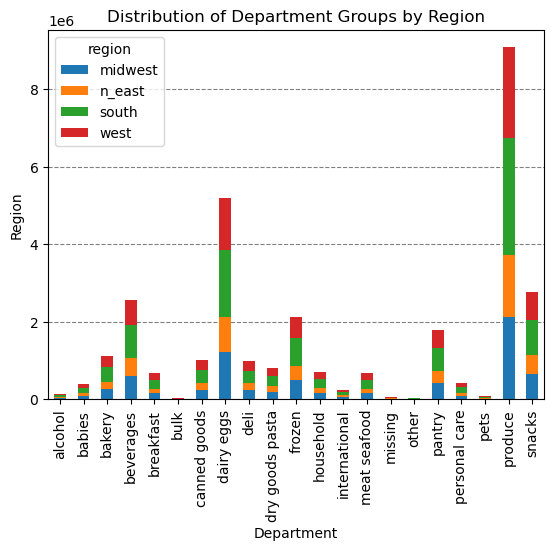

In [333]:
# Plotting a bar chart showing region and department, expoert it to Analysis folder
bar4 = region_dep.plot(kind='bar', stacked =True)
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='gray', linestyle='dashed')
plt.title('Distribution of Department Groups by Region')
plt.ylabel('Region')
plt.xlabel('Department')
bar4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_department.png'),bbox_inches='tight')

##### Dependants by region

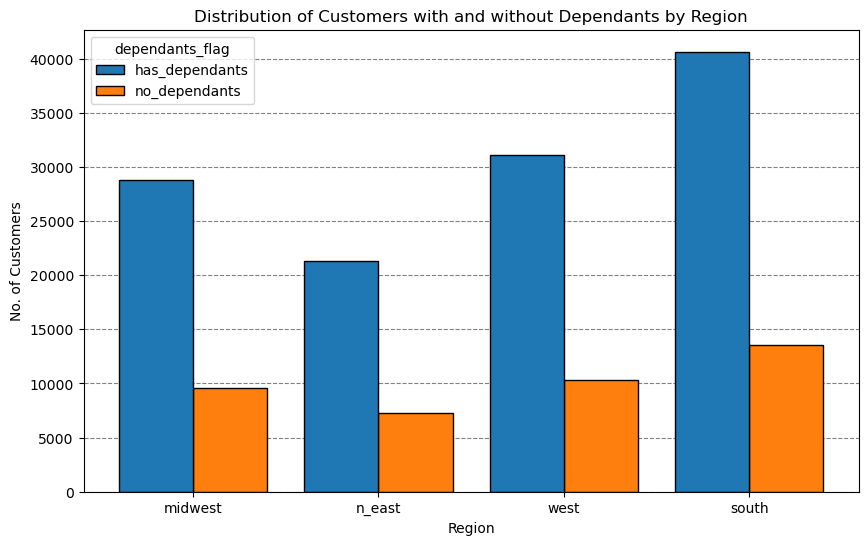

In [338]:
# Plotting a histogram using the dependants_flag and region columns
plt.figure(figsize=(10, 6))
sns.histplot(data=user_sample, x='region', hue='dependants_flag', multiple='dodge', shrink=.8, alpha=1)
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
plt.title('Distribution of Customers with and without Dependants by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_dependants_by_region.png'), bbox_inches = 'tight')
plt.show()

##### Prices by regions

In [343]:
# Creating a crosstab linking region and price range
region_pricerange = pd.crosstab(merged_data['region'], merged_data['price_range_loc'], dropna = False)

In [346]:
#Checking region_pricerange
region_pricerange

price_range_loc,High-range product,Low-range product,Mid-range product
region,,,
midwest,93281,2267099,4907327
n_east,69733,1712373,3687962
south,132663,3217518,6970281
west,102280,2477910,5354237


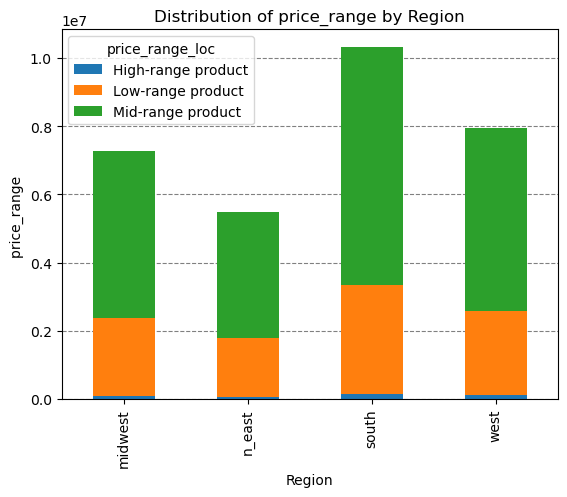

In [350]:
# Plotting a bar chart using the region_pricerange data
bar6 = region_pricerange.plot(kind='bar', stacked =True)
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='gray', linestyle='dashed')
plt.title('Distribution of price_range by Region')
plt.ylabel('price_range ')
plt.xlabel('Region')
bar6.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_pricerange.png'), bbox_inches='tight')

##### Profiling by department sales

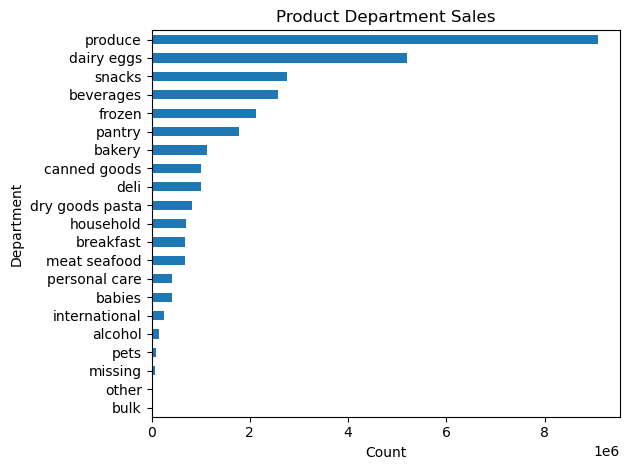

In [357]:
# Plotting department sales bar chart
dept_bar=merged_data['department'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.title('Product Department Sales')
plt.xlabel('Count')
plt.ylabel('Department')
plt.tight_layout()

In [360]:
# Exporting Department Bar Chart
dept_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','department_product_bar.png'))

##### Profiling department sales by age_groups

In [365]:
# Creating a crosstab to plot age_group profile against departments
age_department_comparison=pd.crosstab(merged_data['age_group'],merged_data['department'],dropna=False)

<Figure size 2500x2500 with 0 Axes>

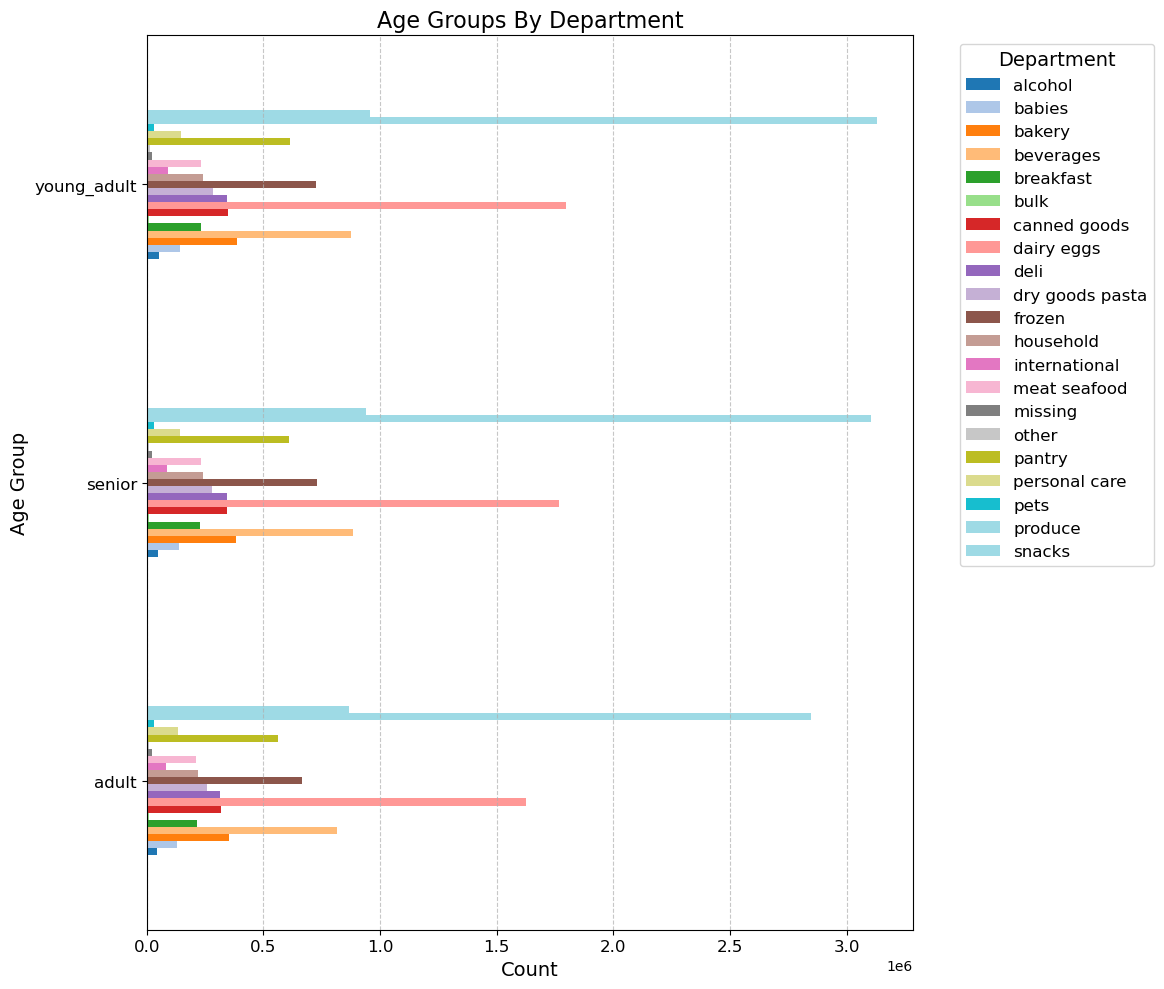

In [368]:
plt.figure(figsize=(25, 25))
age_department_comparison_bar = age_department_comparison.plot(kind='barh', figsize=(14, 10), colormap='tab20', rot=0)

# Add title and labels with larger font size
plt.title('Age Groups By Department', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Age Group', fontsize=14)

# Increase font size for ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

# Add gridlines
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Adjust layout to make room for legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()

In [371]:
# Exporting the Chart
age_department_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_department_comparison_bar.png'))

##### Profiling department_sales by income_groups

In [376]:
# Creating crosstab for income_group profile and departments
income_group_department_comparison=pd.crosstab(merged_data['income_group'],merged_data['department'],dropna=False)

<Figure size 1800x1200 with 0 Axes>

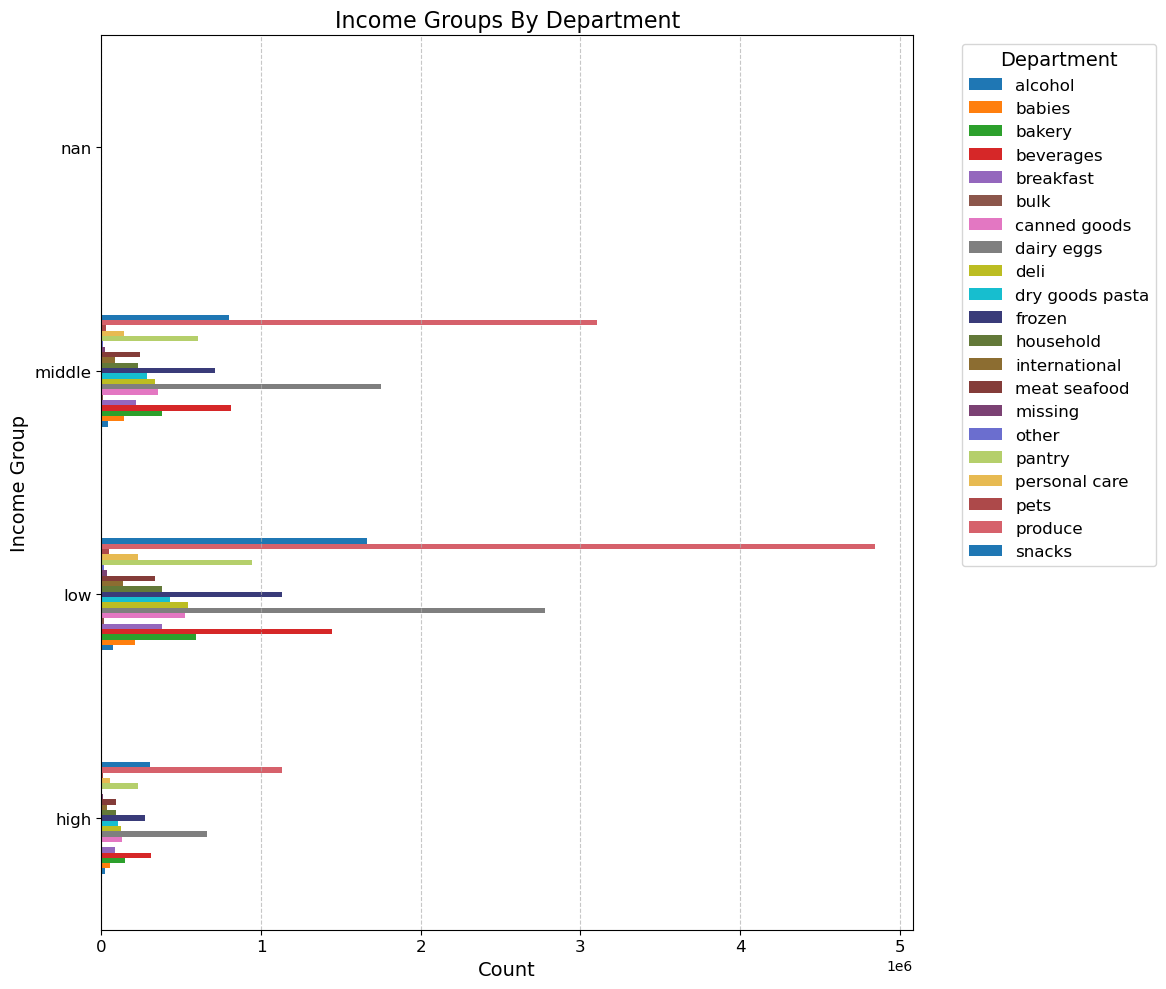

In [379]:
# Defining custom color palette with distinct colors
custom_colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#393b79', '#637939', '#8c6d31', '#843c39', '#7b4173',
    '#6b6ecf', '#b5cf6b', '#e7ba52', '#ad494a', '#d6616b'
]

# Create a bar chart with custom colors
plt.figure(figsize=(18, 12))
income_group_department_comparison_bar = income_group_department_comparison.plot(
    kind='barh', 
    figsize=(14, 10), 
    color=custom_colors, 
    rot=0
)

# Add title and labels with larger font size
plt.title('Income Groups By Department', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Income Group', fontsize=14)

# Increase font size for ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

# Add gridlines
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Adjust layout to make room for legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()

In [382]:
# Exporting Chart to Analysis Folder
income_group_department_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','income_group_department_comparison_bar.png'))

##### Profiling department sales by regions

In [386]:
# Defining a crosstab to juxtapose regions against departments
region_department_comparison=pd.crosstab(merged_data['region'],merged_data['department'],dropna=False)

<Figure size 2000x2500 with 0 Axes>

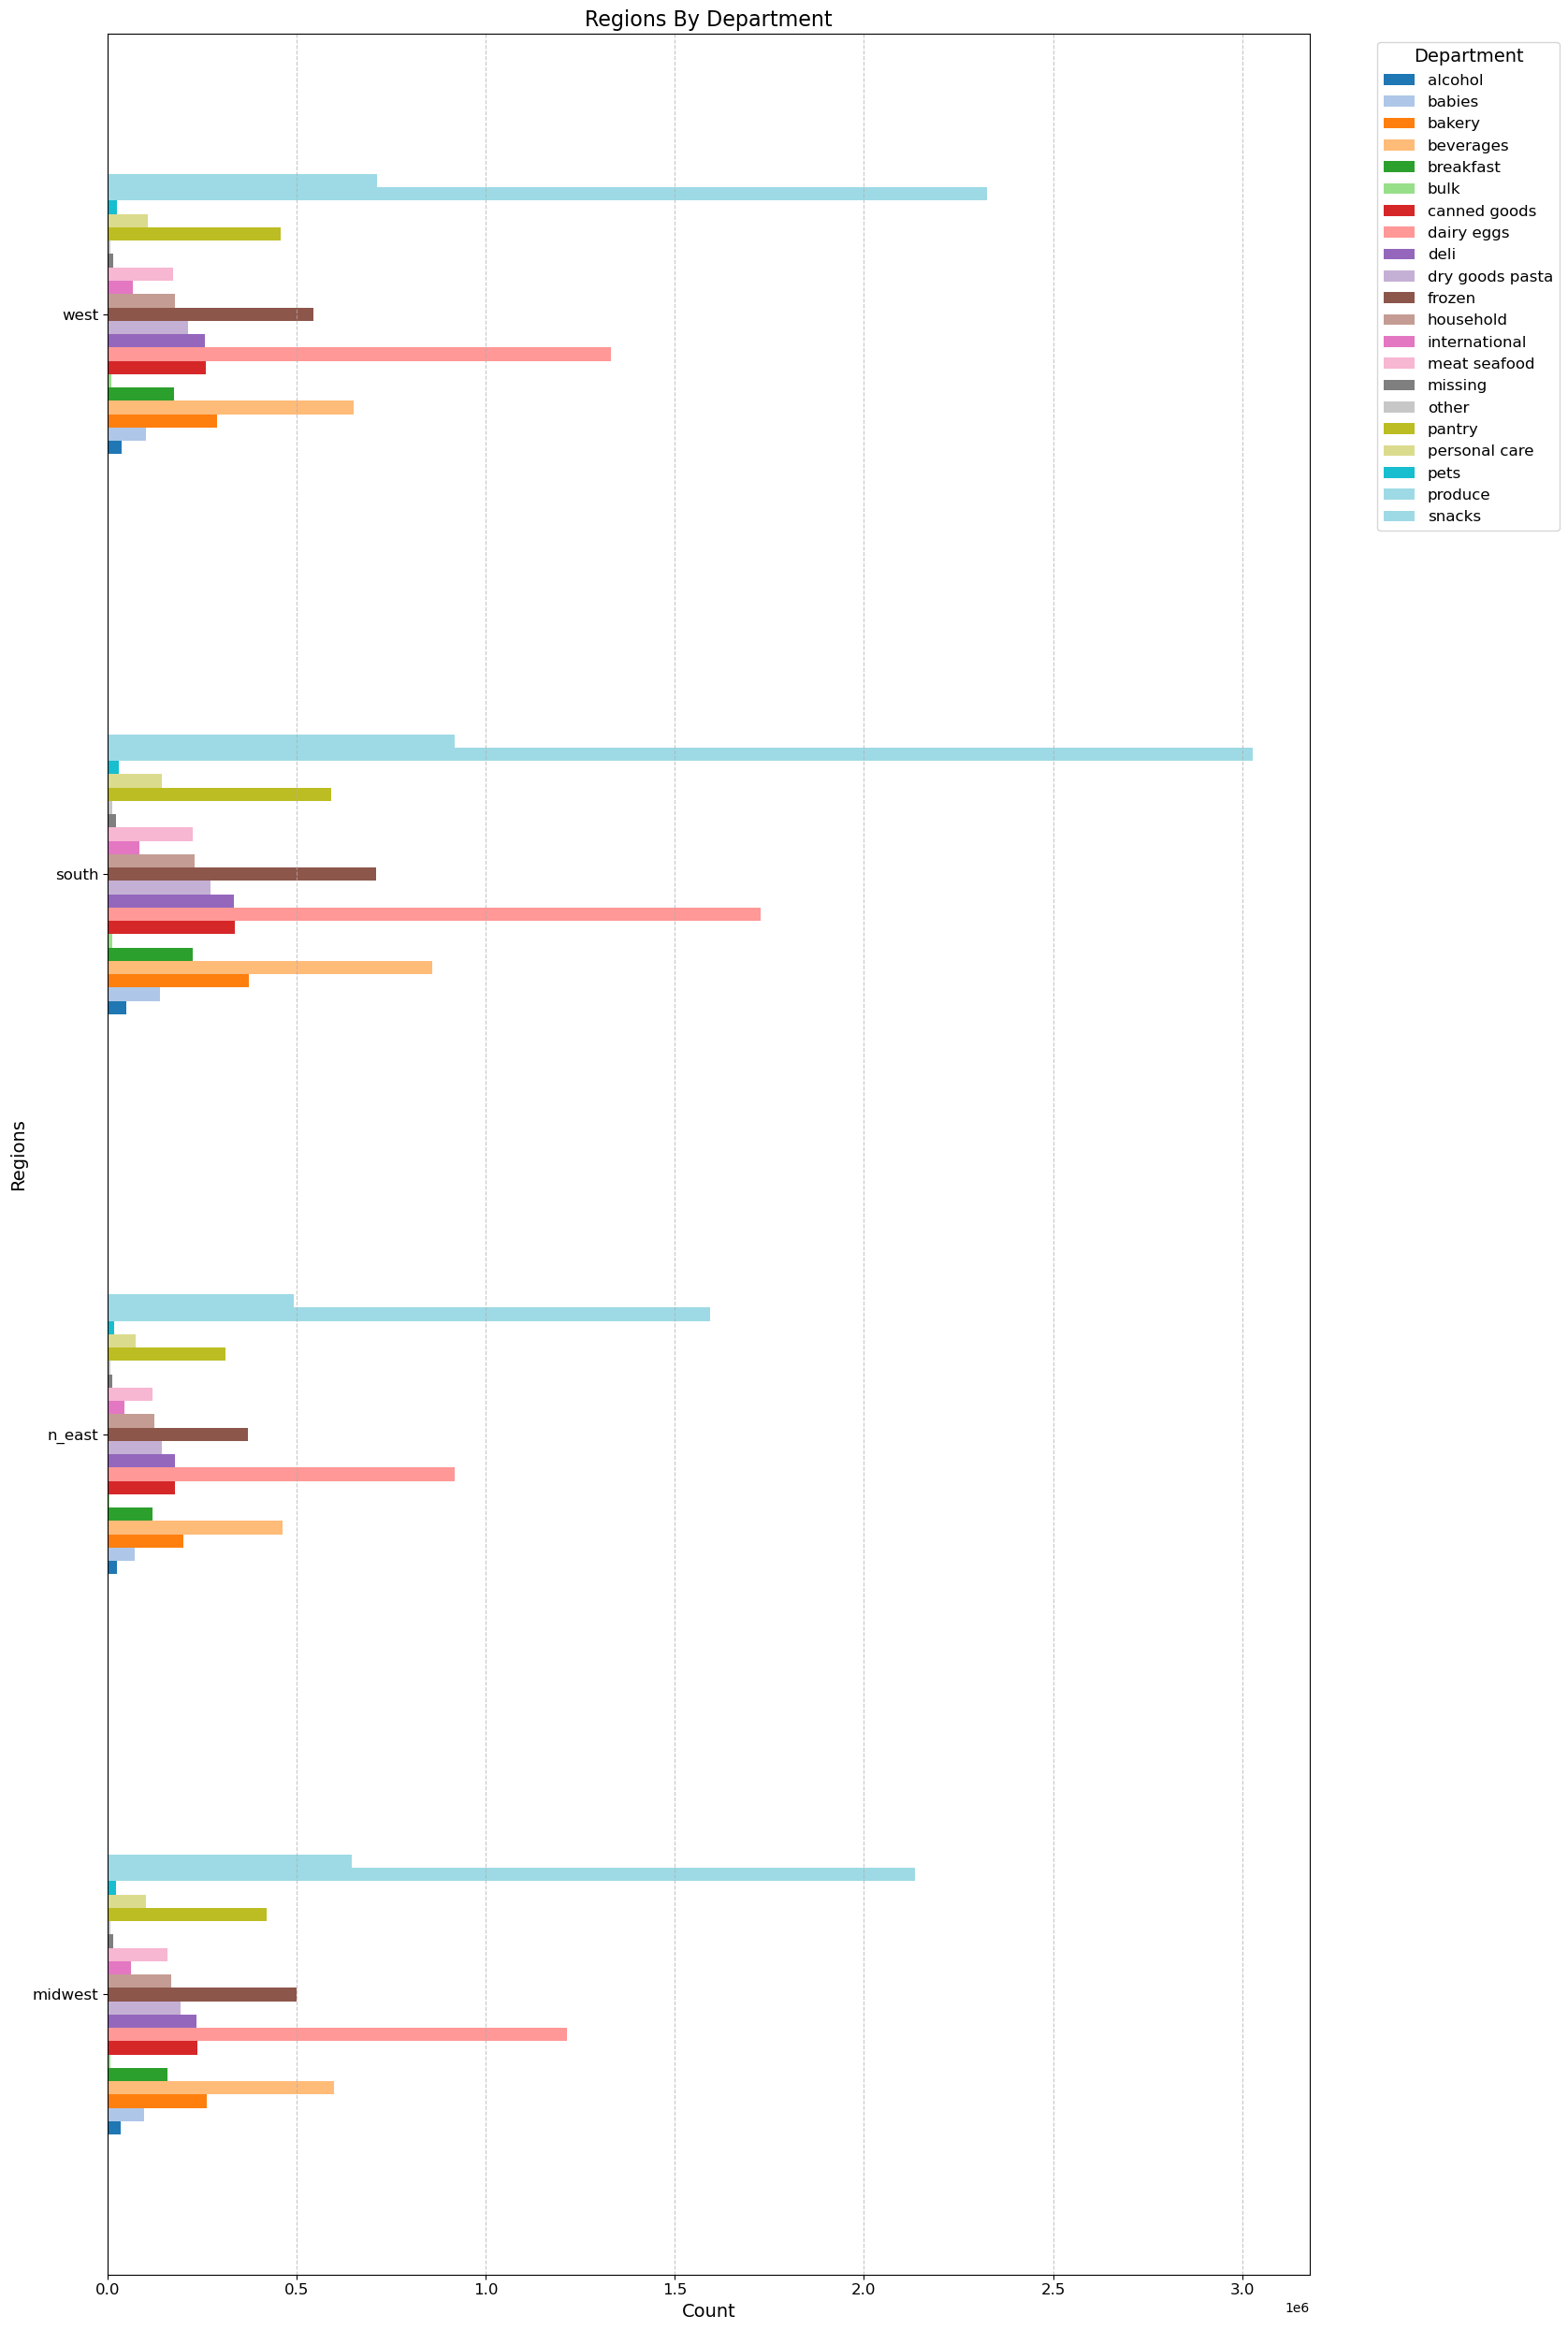

In [390]:
plt.figure(figsize=(20, 25))
region_department_comparison_bar = region_department_comparison.plot(kind='barh', figsize=(20, 25), colormap='tab20', rot=0)

# Add title and labels with larger font size
plt.title('Regions By Department', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Regions', fontsize=14)

# Increase font size for ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

# Add gridlines
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Adjust layout to make room for legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()

In [393]:
# Exporting the  Chart
region_department_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','region_department_comparison_bar.png'))

In [ ]:
# Exporting dataframe as merged_data_final to 'Prepared Data' folder

In [397]:
merged_data.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'merged_data_final.pkl'))